In [1]:
#import libraries
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv
df = pd.read_csv('IGP1.csv')
df

,ID,Company name,Credit score,Credit score date,Credit limit,Likelihood of failure(%),Profit Margin,Gross Margin,Debtor Collection,Creditors Payment,...,Turnover in year2,Turnover in year3,Total Assets,Total Assets of year1,Total Assets of year2,Total Assets of year3,Number of Employees,Number of Employees in year1,Number of Employees in year2,Number of Employees in year3
0,1.0,SHELL PLC,95,26-09-2023,n.a.,0.9,16.78,NaN,37.17,40.29,...,"13,40,81,000","26,53,80,000","36,60,90,000","29,87,44,000","27,75,88,000","30,47,45,000","87,000","82,000","86,000","83,000"
1,2.0,BP P.L.C.,95,27-11-2023,"5,00,00,000",0.9,6.19,NaN,41.40,69.23,...,"13,43,04,000","21,30,06,000","23,80,86,000","21,22,28,000","19,58,97,000","22,24,85,000","66,300","64,000","68,100","72,500"
2,3.0,GLENCORE ENERGY UK LTD.,85,29-09-2023,"1,94,58,000",0.9,0.23,1.35,23.42,27.19,...,"2,82,65,176","5,42,08,695","1,25,50,765","96,93,081","54,42,881","68,15,203",492,474,443,419
3,4.0,UNILEVER PLC,95,11-01-2024,"5,00,00,000",0.9,17.21,40.23,27.61,67.44,...,"4,53,95,000","4,39,87,000","6,89,11,000","6,31,16,000","6,05,50,000","5,48,42,000","1,38,000","1,49,000","1,50,000","1,53,000"
4,5.0,RIO TINTO PLC,99,26-09-2023,"5,00,00,000",0.9,33.59,NaN,14.32,21.48,...,"3,26,51,000","3,25,33,000","7,99,44,000","7,60,17,000","7,12,80,000","6,61,76,000","53,726","49,345","47,474","46,007"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996.0,IMPACT PROPERTY 7 LIMITED,89,21-07-2023,"9,50,940",0.9,66.12,NaN,NaN,NaN,...,n.a.,n.a.,"66,077","64,025",n.a.,n.a.,NaN,NaN,n.a.,n.a.
19996,19997.0,R.A.H.M.S. LIMITED,97,25-09-2023,"1,27,860",1.0,17.03,NaN,8.24,2.92,...,NaN,NaN,"4,598","4,502","4,203","4,545",22,22,23,24
19997,19998.0,FTSE (JAPAN) LIMITED,89,11-10-2023,"2,30,652",0.9,28.05,96.77,NaN,0.29,...,"3,614","3,336","5,303","7,262","5,215","4,559",18,15,14,13
19998,19999.0,RUNBARO LIMITED,77,11-08-2023,500,2.2,-40.25,91.26,5.91,11.94,...,"1,988","5,681","6,419","7,539","7,978","8,370",101,101,96,122


In [3]:
#check datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  float64
 1   Company name                  20000 non-null  object 
 2   Credit score                  20000 non-null  object 
 3   Credit score date             18431 non-null  object 
 4   Credit limit                  20000 non-null  object 
 5   Likelihood of failure(%)      20000 non-null  object 
 6   Profit Margin                 19388 non-null  object 
 7   Gross Margin                  13899 non-null  object 
 8   Debtor Collection             14910 non-null  object 
 9   Creditors Payment             16108 non-null  object 
 10  Current Ratio                 19387 non-null  object 
 11  Liquidity Ratio               19387 non-null  object 
 12  Gearing                       17627 non-null  object 
 13  R

In [4]:
#correct columns names 
names = {
    'Unnamed: 0' : 'ID',
    'Credit limit\nGBP' : 'Credit limit',
    'Likelihood of failure\n%' : 'Likelihood of failure(%)',
    'Profit margin\nLast avail. yr': 'Profit Margin',
    'Gross margin\nLast avail. yr': 'Gross Margin',
    'Debtor Collection\nLast avail. yr': 'Debtor Collection',
    'Creditors Payment\nLast avail. yr': 'Creditors Payment',
    'Current ratio (x)\nLast avail. yr': 'Current Ratio',
    'Liquidity ratio (x)\nLast avail. yr': 'Liquidity Ratio',
    'Gearing\nLast avail. yr': 'Gearing',
    'Return on Total Assets\nLast avail. yr': 'Return on Total Assets',
    'Profit (Loss) before Taxation\nth GBP Last avail. yr': 'Profit before Tax',
    'Profit (Loss) before Taxation\nth GBP Year - 1': 'Profit before Tax for year1',
    'Profit (Loss) before Taxation\nth GBP Year - 2': 'Profit before Tax for year2',
    'Profit (Loss) before Taxation\nth GBP Year - 3': 'Profit before Tax for year3',
    'Profit (Loss) after Tax\nth GBP Last avail. yr': 'Profit after Tax',
    'Profit (Loss) after Tax\nth GBP Year - 1': 'Profit after Tax for year1',
    'Profit (Loss) after Tax\nth GBP Year - 2': 'Profit after Tax for year2',
    'Profit (Loss) after Tax\nth GBP Year - 3': 'Profit after Tax for year3',
    'Turnover\nth GBP Last avail. yr': 'Turnover',
    'Turnover\nth GBP Year - 1': 'Turnover in year1',
    'Turnover\nth GBP Year - 2': 'Turnover in year2',
    'Turnover\nth GBP Year - 3': 'Turnover in year3',
    'Total Assets\nth GBP Last avail. yr': 'Total Assets',
    'Total Assets\nth GBP Year - 1': 'Total Assets of year1',
    'Total Assets\nth GBP Year - 2': 'Total Assets of year2',
    'Total Assets\nth GBP Year - 3': 'Total Assets of year3',
    'Number of employees\nLast avail. yr': 'Number of Employees',
    'Number of employees\nYear - 1': 'Number of Employees in year1',
    'Number of employees\nYear - 2': 'Number of Employees in year2',
    'Number of employees\nYear - 3': 'Number of Employees in year3'
}
df.rename(columns=names, inplace=True)
df

,ID,Company name,Credit score,Credit score date,Credit limit,Likelihood of failure(%),Profit Margin,Gross Margin,Debtor Collection,Creditors Payment,...,Turnover in year2,Turnover in year3,Total Assets,Total Assets of year1,Total Assets of year2,Total Assets of year3,Number of Employees,Number of Employees in year1,Number of Employees in year2,Number of Employees in year3
0,1.0,SHELL PLC,95,26-09-2023,n.a.,0.9,16.78,NaN,37.17,40.29,...,"13,40,81,000","26,53,80,000","36,60,90,000","29,87,44,000","27,75,88,000","30,47,45,000","87,000","82,000","86,000","83,000"
1,2.0,BP P.L.C.,95,27-11-2023,"5,00,00,000",0.9,6.19,NaN,41.40,69.23,...,"13,43,04,000","21,30,06,000","23,80,86,000","21,22,28,000","19,58,97,000","22,24,85,000","66,300","64,000","68,100","72,500"
2,3.0,GLENCORE ENERGY UK LTD.,85,29-09-2023,"1,94,58,000",0.9,0.23,1.35,23.42,27.19,...,"2,82,65,176","5,42,08,695","1,25,50,765","96,93,081","54,42,881","68,15,203",492,474,443,419
3,4.0,UNILEVER PLC,95,11-01-2024,"5,00,00,000",0.9,17.21,40.23,27.61,67.44,...,"4,53,95,000","4,39,87,000","6,89,11,000","6,31,16,000","6,05,50,000","5,48,42,000","1,38,000","1,49,000","1,50,000","1,53,000"
4,5.0,RIO TINTO PLC,99,26-09-2023,"5,00,00,000",0.9,33.59,NaN,14.32,21.48,...,"3,26,51,000","3,25,33,000","7,99,44,000","7,60,17,000","7,12,80,000","6,61,76,000","53,726","49,345","47,474","46,007"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996.0,IMPACT PROPERTY 7 LIMITED,89,21-07-2023,"9,50,940",0.9,66.12,NaN,NaN,NaN,...,n.a.,n.a.,"66,077","64,025",n.a.,n.a.,NaN,NaN,n.a.,n.a.
19996,19997.0,R.A.H.M.S. LIMITED,97,25-09-2023,"1,27,860",1.0,17.03,NaN,8.24,2.92,...,NaN,NaN,"4,598","4,502","4,203","4,545",22,22,23,24
19997,19998.0,FTSE (JAPAN) LIMITED,89,11-10-2023,"2,30,652",0.9,28.05,96.77,NaN,0.29,...,"3,614","3,336","5,303","7,262","5,215","4,559",18,15,14,13
19998,19999.0,RUNBARO LIMITED,77,11-08-2023,500,2.2,-40.25,91.26,5.91,11.94,...,"1,988","5,681","6,419","7,539","7,978","8,370",101,101,96,122


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  float64
 1   Company name                  20000 non-null  object 
 2   Credit score                  20000 non-null  object 
 3   Credit score date             18431 non-null  object 
 4   Credit limit                  20000 non-null  object 
 5   Likelihood of failure(%)      20000 non-null  object 
 6   Profit Margin                 19388 non-null  object 
 7   Gross Margin                  13899 non-null  object 
 8   Debtor Collection             14910 non-null  object 
 9   Creditors Payment             16108 non-null  object 
 10  Current Ratio                 19387 non-null  object 
 11  Liquidity Ratio               19387 non-null  object 
 12  Gearing                       17627 non-null  object 
 13  R

In [6]:
output_file = ("IGP1.csv")
df.to_csv(output_file, index=False)

In [7]:
##check missing values
df1 = df[pd.isna(df['Credit score date'])]
df1

,ID,Company name,Credit score,Credit score date,Credit limit,Likelihood of failure(%),Profit Margin,Gross Margin,Debtor Collection,Creditors Payment,...,Turnover in year2,Turnover in year3,Total Assets,Total Assets of year1,Total Assets of year2,Total Assets of year3,Number of Employees,Number of Employees in year1,Number of Employees in year2,Number of Employees in year3
27,28.0,INSTANT BRANDS (EMEA) LIMITED,n.a.,NaN,n.a.,n.a.,2.80,17.64,152.19,55.42,...,NaN,NaN,"2,34,05,583","4,681","2,941",581,22,5,2,2
100,101.0,REED ELSEVIER PLC/NV,n.a.,NaN,n.a.,n.a.,21.29,65.25,82.89,21.05,...,"61,16,000","60,02,000","1,10,87,000","1,04,95,000","1,10,14,000","1,15,03,000","28,500","28,200","30,500","30,600"
114,115.0,TXU EUROPE LIMITED,n.a.,NaN,n.a.,n.a.,0.90,24.61,42.19,51.35,...,"21,69,000",n.a.,"98,24,500","76,71,000","69,69,600",n.a.,"4,806","6,729","7,233",n.a.
154,155.0,LIBERTY COMMODITIES LIMITED,n.a.,NaN,n.a.,n.a.,0.21,2.07,15.75,4.02,...,"30,10,692","31,55,738","2,14,478","2,60,998","2,98,870","2,66,022",13,14,30,18
265,266.0,DEPARTMENT STORES REALISATIONS LIMITED,n.a.,NaN,n.a.,n.a.,-11.73,-3.10,3.64,69.22,...,"21,05,400","20,99,300","29,07,300","28,67,300","27,17,100","25,19,600","22,283","23,727","24,545","24,806"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,19972.0,INEVIDENCE LIMITED,n.a.,NaN,n.a.,n.a.,21.84,78.74,69.17,15.57,...,"3,291","4,141","8,298","6,587","4,813","4,122",41,38,34,34
19976,19977.0,S.W. FARMER & SON (LEEDS) LIMITED,n.a.,NaN,n.a.,n.a.,0.50,NaN,30.00,65.25,...,"2,655","3,491","1,606","1,275","1,863","1,092",113,96,82,78
19977,19978.0,COTESBACH ENERGY LIMITED,n.a.,NaN,n.a.,n.a.,12.26,16.55,1.68,NaN,...,"3,652","4,023","1,951","1,302","1,810","1,972",NaN,NaN,NaN,3
19981,19982.0,CLPE ROC - 3A LIMITED,n.a.,NaN,n.a.,n.a.,7.40,19.42,1.89,NaN,...,"3,566","4,592","1,516","1,340","1,304","1,256",NaN,NaN,3,3


In [8]:
##remove missing values
df2 = df.dropna(subset=['Credit score date'])
df2

,ID,Company name,Credit score,Credit score date,Credit limit,Likelihood of failure(%),Profit Margin,Gross Margin,Debtor Collection,Creditors Payment,...,Turnover in year2,Turnover in year3,Total Assets,Total Assets of year1,Total Assets of year2,Total Assets of year3,Number of Employees,Number of Employees in year1,Number of Employees in year2,Number of Employees in year3
0,1.0,SHELL PLC,95,26-09-2023,n.a.,0.9,16.78,NaN,37.17,40.29,...,"13,40,81,000","26,53,80,000","36,60,90,000","29,87,44,000","27,75,88,000","30,47,45,000","87,000","82,000","86,000","83,000"
1,2.0,BP P.L.C.,95,27-11-2023,"5,00,00,000",0.9,6.19,NaN,41.40,69.23,...,"13,43,04,000","21,30,06,000","23,80,86,000","21,22,28,000","19,58,97,000","22,24,85,000","66,300","64,000","68,100","72,500"
2,3.0,GLENCORE ENERGY UK LTD.,85,29-09-2023,"1,94,58,000",0.9,0.23,1.35,23.42,27.19,...,"2,82,65,176","5,42,08,695","1,25,50,765","96,93,081","54,42,881","68,15,203",492,474,443,419
3,4.0,UNILEVER PLC,95,11-01-2024,"5,00,00,000",0.9,17.21,40.23,27.61,67.44,...,"4,53,95,000","4,39,87,000","6,89,11,000","6,31,16,000","6,05,50,000","5,48,42,000","1,38,000","1,49,000","1,50,000","1,53,000"
4,5.0,RIO TINTO PLC,99,26-09-2023,"5,00,00,000",0.9,33.59,NaN,14.32,21.48,...,"3,26,51,000","3,25,33,000","7,99,44,000","7,60,17,000","7,12,80,000","6,61,76,000","53,726","49,345","47,474","46,007"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996.0,IMPACT PROPERTY 7 LIMITED,89,21-07-2023,"9,50,940",0.9,66.12,NaN,NaN,NaN,...,n.a.,n.a.,"66,077","64,025",n.a.,n.a.,NaN,NaN,n.a.,n.a.
19996,19997.0,R.A.H.M.S. LIMITED,97,25-09-2023,"1,27,860",1.0,17.03,NaN,8.24,2.92,...,NaN,NaN,"4,598","4,502","4,203","4,545",22,22,23,24
19997,19998.0,FTSE (JAPAN) LIMITED,89,11-10-2023,"2,30,652",0.9,28.05,96.77,NaN,0.29,...,"3,614","3,336","5,303","7,262","5,215","4,559",18,15,14,13
19998,19999.0,RUNBARO LIMITED,77,11-08-2023,500,2.2,-40.25,91.26,5.91,11.94,...,"1,988","5,681","6,419","7,539","7,978","8,370",101,101,96,122


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            18431 non-null  float64
 1   Company name                  18431 non-null  object 
 2   Credit score                  18431 non-null  object 
 3   Credit score date             18431 non-null  object 
 4   Credit limit                  18431 non-null  object 
 5   Likelihood of failure(%)      18431 non-null  object 
 6   Profit Margin                 18229 non-null  object 
 7   Gross Margin                  12933 non-null  object 
 8   Debtor Collection             13960 non-null  object 
 9   Creditors Payment             15158 non-null  object 
 10  Current Ratio                 18247 non-null  object 
 11  Liquidity Ratio               18247 non-null  object 
 12  Gearing                       16547 non-null  object 
 13  R

In [10]:
# Replace 'n.a.' and 'n.s.' with NaN
df2.replace(['n.a.', 'n.s.'], float('nan'), inplace=True)

# Convert remaining NaN values to 0 
df2.fillna(0, inplace=True)  

# Convert numeric columns to integers
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

df2[numeric_columns] = df2[numeric_columns].astype(int)

C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\218968217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(['n.a.', 'n.s.'], float('nan'), inplace=True)
C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\218968217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)
C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\218968217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            18431 non-null  int32 
 1   Company name                  18431 non-null  object
 2   Credit score                  18431 non-null  object
 3   Credit score date             18431 non-null  object
 4   Credit limit                  18431 non-null  object
 5   Likelihood of failure(%)      18431 non-null  object
 6   Profit Margin                 18431 non-null  object
 7   Gross Margin                  18431 non-null  object
 8   Debtor Collection             18431 non-null  object
 9   Creditors Payment             18431 non-null  object
 10  Current Ratio                 18431 non-null  object
 11  Liquidity Ratio               18431 non-null  object
 12  Gearing                       18431 non-null  object
 13  Return on Total 

In [12]:
#remove the commas from specific columns[for change datatype into int]

# List of columns to process
columns_to_process = ['Credit limit', 'Profit before Tax', 'Profit before Tax for year1',
                      'Profit before Tax for year2', 'Profit before Tax for year3',
                      'Profit after Tax', 'Profit after Tax for year1', 'Profit after Tax for year2',
                      'Profit after Tax for year3', 'Turnover', 'Turnover in year1', 'Turnover in year2',
                      'Turnover in year3', 'Total Assets', 'Total Assets of year1', 'Total Assets of year2',
                      'Total Assets of year3', 'Number of Employees', 'Number of Employees in year1',
                      'Number of Employees in year2', 'Number of Employees in year3']

#Convert columns to string type
df2[columns_to_process] = df2[columns_to_process].astype(str)


#Remove commas from the specified columns
df2[columns_to_process] = df2[columns_to_process].replace(',', '', regex=True)

df2[columns_to_process] = df2[columns_to_process].apply(pd.to_numeric, errors='coerce')


C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\3890665594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[columns_to_process] = df2[columns_to_process].astype(str)
C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\3890665594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[columns_to_process] = df2[columns_to_process].replace(',', '', regex=True)
C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\3890665594.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            18431 non-null  int32 
 1   Company name                  18431 non-null  object
 2   Credit score                  18431 non-null  object
 3   Credit score date             18431 non-null  object
 4   Credit limit                  18431 non-null  int64 
 5   Likelihood of failure(%)      18431 non-null  object
 6   Profit Margin                 18431 non-null  object
 7   Gross Margin                  18431 non-null  object
 8   Debtor Collection             18431 non-null  object
 9   Creditors Payment             18431 non-null  object
 10  Current Ratio                 18431 non-null  object
 11  Liquidity Ratio               18431 non-null  object
 12  Gearing                       18431 non-null  object
 13  Return on Total 

In [14]:
#change datatype of 'Credit score' and 'Credit score date'
df2['Credit score']=pd.to_numeric(df2['Credit score'],errors='coerce')
df2['Credit score date']=pd.to_datetime(df2['Credit score date'],errors='coerce')

C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\3321195615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Credit score']=pd.to_numeric(df2['Credit score'],errors='coerce')
C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\3321195615.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['Credit score date']=pd.to_datetime(df2['Credit score date'],errors='coerce')
C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\3321195615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            18431 non-null  int32         
 1   Company name                  18431 non-null  object        
 2   Credit score                  18431 non-null  int64         
 3   Credit score date             18431 non-null  datetime64[ns]
 4   Credit limit                  18431 non-null  int64         
 5   Likelihood of failure(%)      18431 non-null  object        
 6   Profit Margin                 18431 non-null  object        
 7   Gross Margin                  18431 non-null  object        
 8   Debtor Collection             18431 non-null  object        
 9   Creditors Payment             18431 non-null  object        
 10  Current Ratio                 18431 non-null  object        
 11  Liquidity Ratio             

In [16]:
#convert columns into float

float_columns = ['Likelihood of failure(%)', 'Profit Margin', 'Gross Margin', 'Debtor Collection',
                 'Creditors Payment', 'Current Ratio', 'Liquidity Ratio', 'Gearing', 'Return on Total Assets']

df2[float_columns] = df2[float_columns].replace(',', '', regex=True).astype(float)

C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\2018000602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[float_columns] = df2[float_columns].replace(',', '', regex=True).astype(float)


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            18431 non-null  int32         
 1   Company name                  18431 non-null  object        
 2   Credit score                  18431 non-null  int64         
 3   Credit score date             18431 non-null  datetime64[ns]
 4   Credit limit                  18431 non-null  int64         
 5   Likelihood of failure(%)      18431 non-null  float64       
 6   Profit Margin                 18431 non-null  float64       
 7   Gross Margin                  18431 non-null  float64       
 8   Debtor Collection             18431 non-null  float64       
 9   Creditors Payment             18431 non-null  float64       
 10  Current Ratio                 18431 non-null  float64       
 11  Liquidity Ratio             

In [18]:
df2.head()

,ID,Company name,Credit score,Credit score date,Credit limit,Likelihood of failure(%),Profit Margin,Gross Margin,Debtor Collection,Creditors Payment,...,Turnover in year2,Turnover in year3,Total Assets,Total Assets of year1,Total Assets of year2,Total Assets of year3,Number of Employees,Number of Employees in year1,Number of Employees in year2,Number of Employees in year3
0,1,SHELL PLC,95,2023-09-26,0,0.9,16.78,0.00,37.17,40.29,...,134081000,265380000,366090000,298744000,277588000,304745000,87000,82000,86000,83000
1,2,BP P.L.C.,95,2023-11-27,50000000,0.9,6.19,0.00,41.40,69.23,...,134304000,213006000,238086000,212228000,195897000,222485000,66300,64000,68100,72500
2,3,GLENCORE ENERGY UK LTD.,85,2023-09-29,19458000,0.9,0.23,1.35,23.42,27.19,...,28265176,54208695,12550765,9693081,5442881,6815203,492,474,443,419
3,4,UNILEVER PLC,95,2024-11-01,50000000,0.9,17.21,40.23,27.61,67.44,...,45395000,43987000,68911000,63116000,60550000,54842000,138000,149000,150000,153000
4,5,RIO TINTO PLC,99,2023-09-26,50000000,0.9,33.59,0.00,14.32,21.48,...,32651000,32533000,79944000,76017000,71280000,66176000,53726,49345,47474,46007


In [19]:
df2.describe()

,ID,Credit score,Credit limit,Likelihood of failure(%),Profit Margin,Gross Margin,Debtor Collection,Creditors Payment,Current Ratio,Liquidity Ratio,...,Turnover in year2,Turnover in year3,Total Assets,Total Assets of year1,Total Assets of year2,Total Assets of year3,Number of Employees,Number of Employees in year1,Number of Employees in year2,Number of Employees in year3
count,18431.000000,18431.000000,1.843100e+04,18431.000000,18431.000000,18431.000000,18431.000000,18431.000000,18431.000000,18431.000000,...,1.843100e+04,1.843100e+04,1.843100e+04,1.843100e+04,1.843100e+04,1.843100e+04,18431.000000,18431.000000,18431.000000,18431.000000
mean,9872.856383,78.661440,3.907040e+06,2.352802,9.309403,30.150793,42.854695,26.993239,3.049724,2.880776,...,1.395564e+05,1.699548e+05,1.160687e+06,1.071919e+06,1.129967e+06,1.092900e+06,530.022137,496.510282,504.950464,514.802507
std,5765.344418,22.334136,9.847605e+06,2.977359,28.329514,33.772353,76.731909,68.992838,6.939903,6.807420,...,1.749445e+06,2.834114e+06,2.713674e+07,2.479672e+07,2.607569e+07,2.381317e+07,4681.793108,4572.140879,5931.239537,6238.566817
min,1.000000,0.000000,0.000000e+00,0.000000,-100.000000,-95.500000,0.000000,0.000000,0.000000,0.000000,...,-3.943700e+07,-8.060000e+05,0.000000e+00,0.000000e+00,-1.527000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4862.500000,68.000000,1.016990e+05,0.900000,0.000000,0.000000,0.000000,0.760000,1.000000,0.880000,...,4.288000e+03,2.480000e+03,1.044450e+04,8.406000e+03,5.969000e+03,4.155500e+03,4.000000,2.000000,0.000000,0.000000
50%,9818.000000,89.000000,4.994740e+05,0.900000,4.380000,19.440000,18.280000,8.860000,1.440000,1.340000,...,1.278500e+04,1.246900e+04,3.126200e+04,2.555300e+04,1.963000e+04,1.562600e+04,53.000000,45.000000,36.000000,31.000000
75%,14846.500000,93.000000,2.096500e+06,2.200000,17.460000,54.220000,57.860000,26.555000,2.570000,2.420000,...,3.816900e+04,3.846050e+04,1.396960e+05,1.197335e+05,9.709550e+04,8.177150e+04,172.000000,148.500000,133.000000,127.000000
max,20000.000000,99.000000,5.000000e+07,19.400000,100.000000,100.000000,983.410000,995.050000,99.870000,99.870000,...,1.343040e+08,2.653800e+08,2.451374e+09,2.185239e+09,2.184120e+09,2.046391e+09,232642.000000,231556.000000,513324.000000,551748.000000


In [20]:
num_cols = df2.select_dtypes(include=['int64', 'float64'])

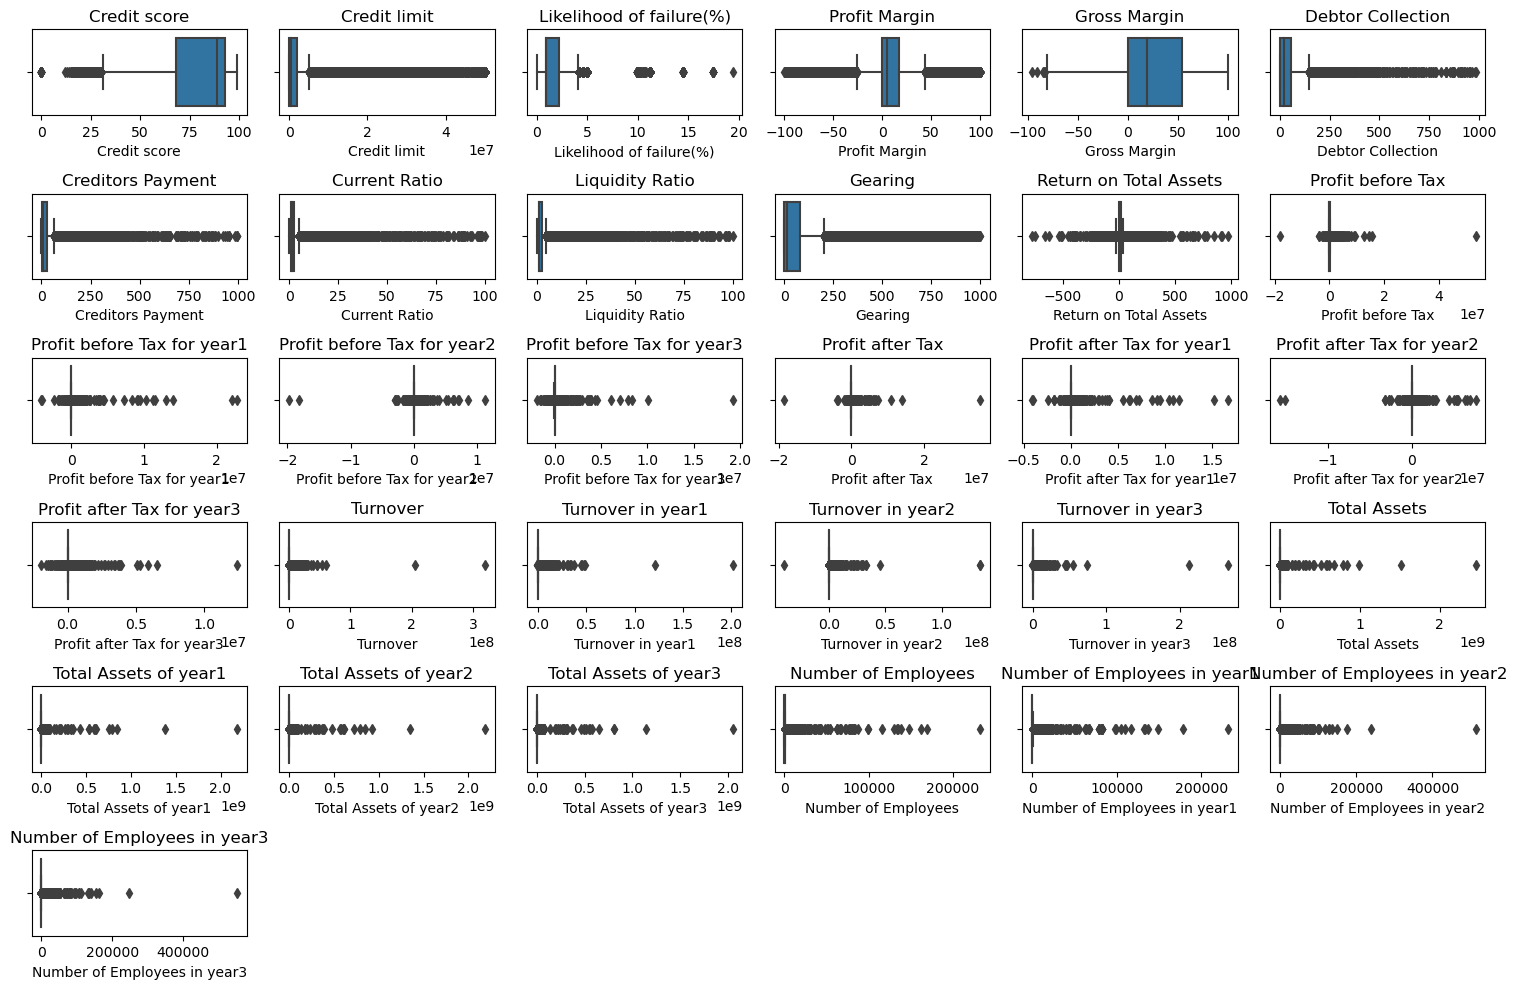

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols.columns):
    plt.subplot(6, 6, i+1)  
    sns.boxplot(x=df2[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

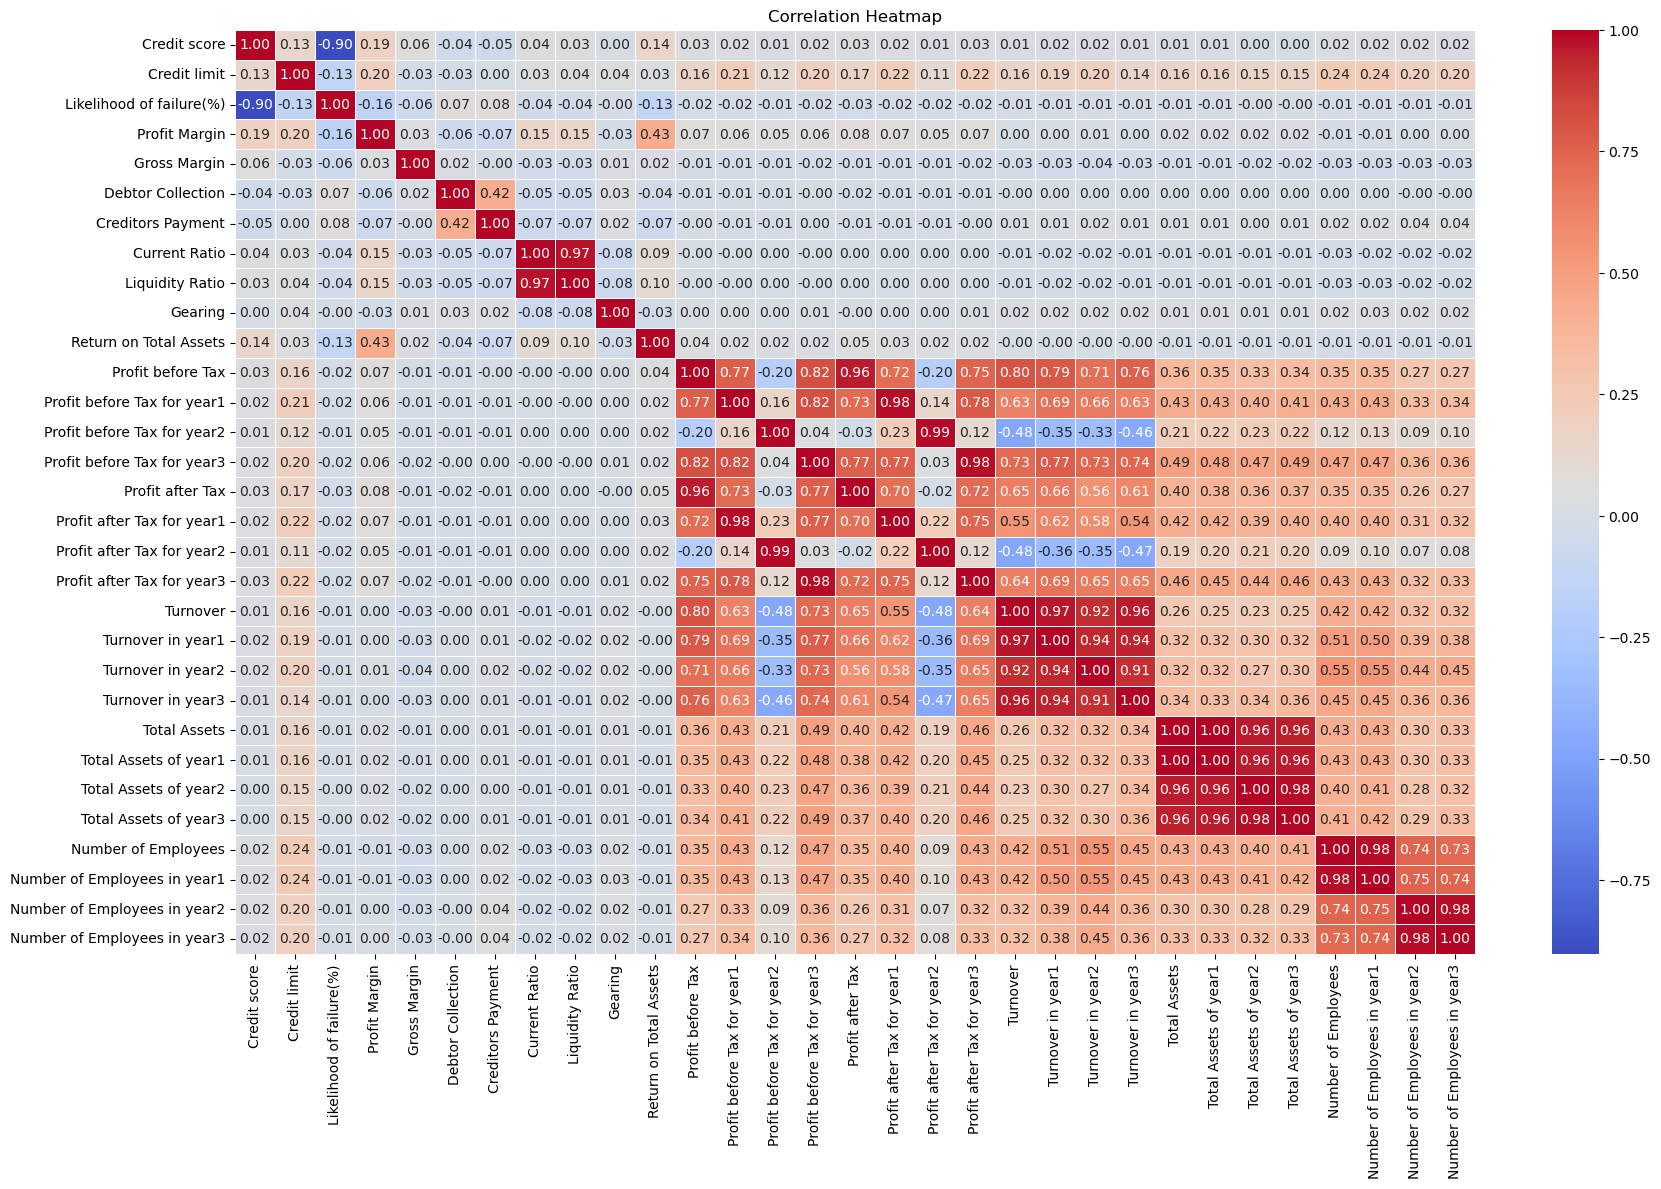

In [22]:
correlation_matrix = num_cols.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

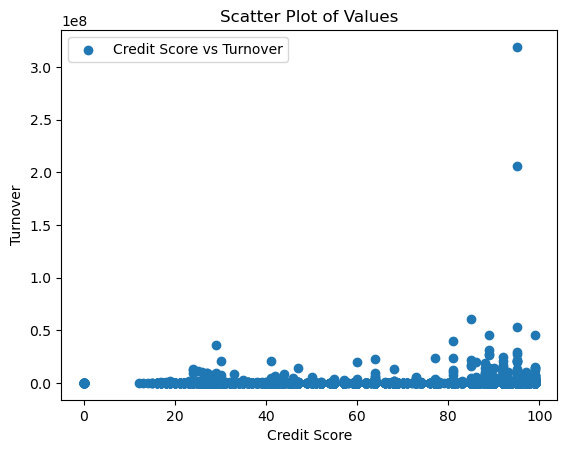

In [23]:
plt.scatter(df2["Credit score"], df2["Turnover"], label='Credit Score vs Turnover')
plt.xlabel('Credit Score')
plt.ylabel('Turnover')
plt.title('Scatter Plot of Values')
plt.legend()
plt.show()

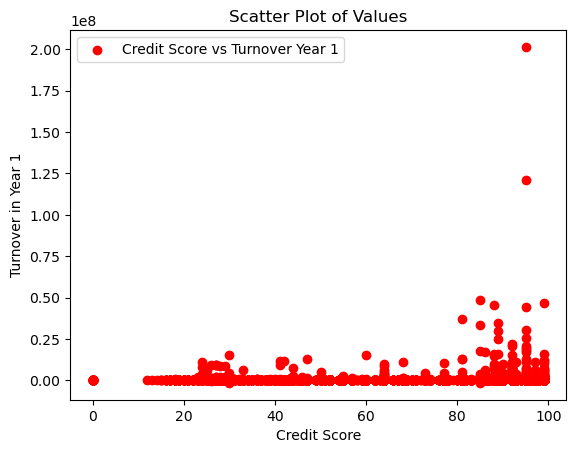

In [24]:
plt.scatter(df2["Credit score"], df2["Turnover in year1"], color="red", label='Credit Score vs Turnover Year 1')
plt.xlabel('Credit Score')
plt.ylabel('Turnover in Year 1')
plt.title('Scatter Plot of Values')
plt.legend()
plt.show()

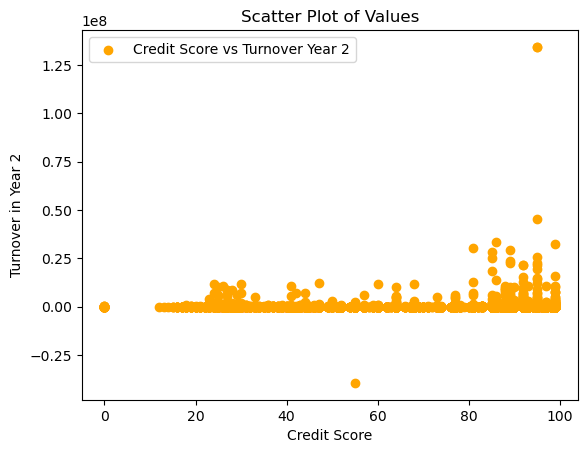

In [25]:
plt.scatter(df2["Credit score"], df2["Turnover in year2"], color="orange", label='Credit Score vs Turnover Year 2')
plt.xlabel('Credit Score')
plt.ylabel('Turnover in Year 2')
plt.title('Scatter Plot of Values')
plt.legend()
plt.show()

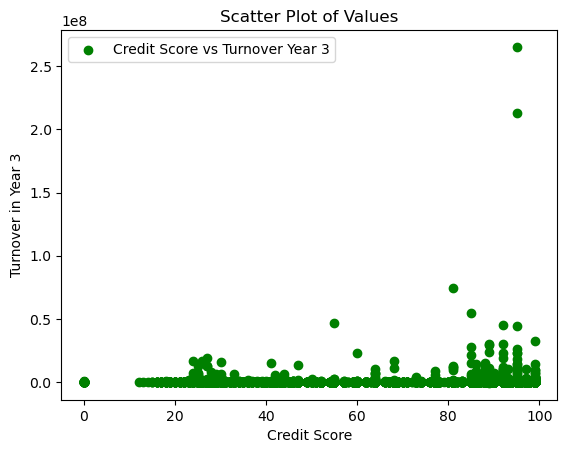

In [26]:
plt.scatter(df2["Credit score"], df2["Turnover in year3"], color="green", label='Credit Score vs Turnover Year 3')
plt.xlabel('Credit Score')
plt.ylabel('Turnover in Year 3')
plt.title('Scatter Plot of Values')
plt.legend()
plt.show()

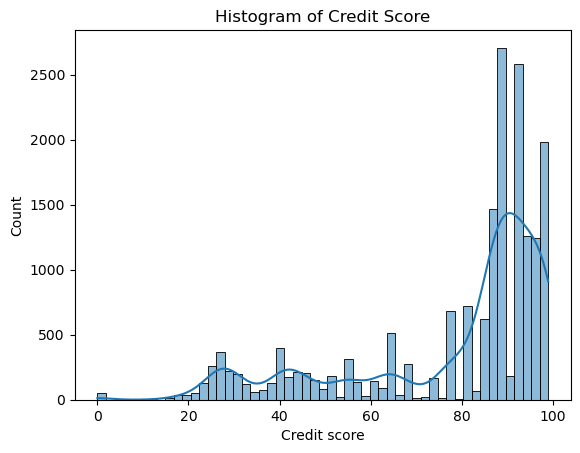

In [27]:
sns.histplot(data=df2, x=df2['Credit score'], kde=True)
plt.title('Histogram of Credit Score')
plt.show()

In [28]:
df2["Credit limit"]

0               0
1        50000000
2        19458000
3        50000000
4        50000000
           ...   
19995      950940
19996      127860
19997      230652
19998         500
19999      625553
Name: Credit limit, Length: 18431, dtype: int64

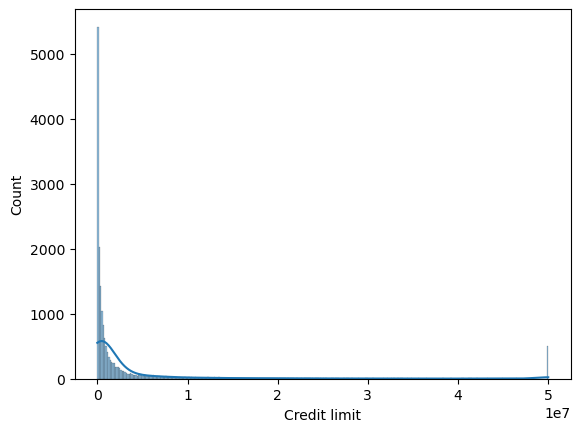

In [29]:
sns.histplot(df2, x=df2['Credit limit'], kde=True)
plt.show()

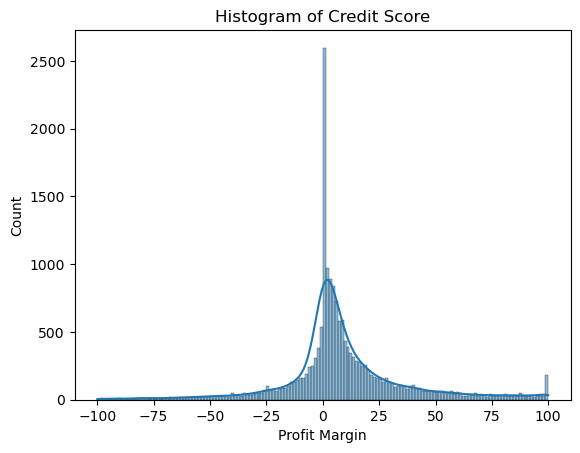

In [33]:
sns.histplot(data=df2, x=df2['Profit Margin'], kde=True)
plt.title('Histogram of Credit Score')
plt.show()

In [30]:
df2["Credit limit"].describe()

count    1.843100e+04
mean     3.907040e+06
std      9.847605e+06
min      0.000000e+00
25%      1.016990e+05
50%      4.994740e+05
75%      2.096500e+06
max      5.000000e+07
Name: Credit limit, dtype: float64

In [31]:
correlation_matrix = df2.corr()
credit_score_correlation = correlation_matrix['Credit score'].sort_values(ascending=False)
print(credit_score_correlation)

Credit score                    1.000000
Profit Margin                   0.189344
Return on Total Assets          0.144250
Credit limit                    0.132963
Gross Margin                    0.063185
Current Ratio                   0.035427
Liquidity Ratio                 0.034451
Profit after Tax                0.031731
Profit before Tax               0.030500
Profit after Tax for year3      0.026382
Profit before Tax for year3     0.024266
Number of Employees in year1    0.022765
Profit before Tax for year1     0.021735
Number of Employees             0.021471
Number of Employees in year2    0.019422
Profit after Tax for year1      0.019149
Turnover in year1               0.018544
Turnover in year2               0.017873
Number of Employees in year3    0.017440
Profit after Tax for year2      0.013921
Turnover                        0.013449
Profit before Tax for year2     0.013340
Turnover in year3               0.011914
Total Assets of year1           0.008602
Total Assets    

C:\Users\Haiders\AppData\Local\Temp\ipykernel_12680\336339541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


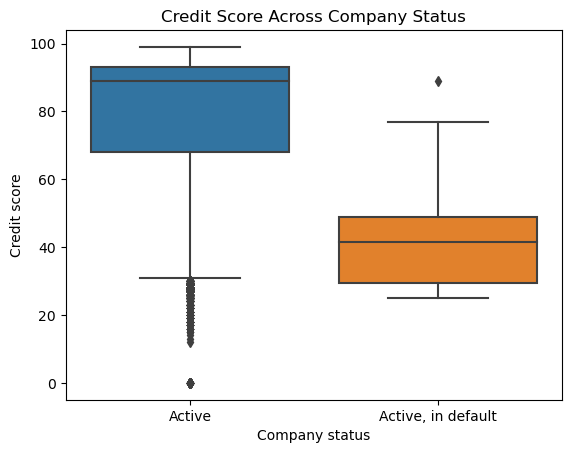

In [32]:
sns.boxplot(data=df2, x='Company status', y='Credit score')
plt.title('Credit Score Across Company Status')
plt.show()